In [1]:
import matplotlib
rc_fonts = {
    "font.weight": 800,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


from rmexp import schema


In [75]:
exps = ['face3pool3pingpong3lego3',
        'face4pool4pingpong4lego4', 'face5pool4pingpong4lego4', 'face5pool4pingpong4lego5',
        'face5pool5pingpong4lego5', 'face5pool5pingpong5lego5', 'face5pool5pingpong5lego6',
        'face5pool6pingpong5lego6',
        'face5pool6pingpong6lego6', 'face5pool6pingpong6lego7', 'face5pool7pingpong6lego7',
        'face5pool7pingpong7lego7',
        'face8pool8pingpong8lego8']
schemes = ['baseline', 'cpushares', ]
apps = ['face', 'lego', 'pingpong', 'pool']

assert len(exps) == len(set(exps)), "redundant!"

In [88]:
# compare total utility of different methods
total_utils = pd.DataFrame()

for scheme in schemes:
    for exp in exps:
        df = pd.read_sql(
            "select sum(utility)/count(distinct name) as utility from ExpLatency where name like %(name)s",
            schema.engine,
            params={'name': exp+'-'+scheme+'%'}
        )
        total_utils = total_utils.append({
            'exp': exp,
            'scheme': scheme,
            'total_utility': df['utility'].iat[0]
        }, ignore_index=True)
        
print(total_utils)

                         exp     scheme  total_utility
0   face3pool3pingpong3lego3   baseline   10039.578220
1   face4pool4pingpong4lego4   baseline    9495.794107
2   face5pool4pingpong4lego4   baseline    9674.512616
3   face5pool4pingpong4lego5   baseline    8648.864912
4   face5pool5pingpong4lego5   baseline    8565.046622
5   face5pool5pingpong5lego5   baseline    8950.159028
6   face5pool5pingpong5lego6   baseline    9078.064552
7   face5pool6pingpong5lego6   baseline    8679.324143
8   face5pool6pingpong6lego6   baseline    8737.138545
9   face5pool6pingpong6lego7   baseline    6392.107654
10  face5pool7pingpong6lego7   baseline    6480.628068
11  face5pool7pingpong7lego7   baseline    5845.263599
12  face8pool8pingpong8lego8   baseline    5374.858834
13  face3pool3pingpong3lego3  cpushares    9298.968603
14  face4pool4pingpong4lego4  cpushares   10367.267709
15  face5pool4pingpong4lego4  cpushares   11554.350198
16  face5pool4pingpong4lego5  cpushares   11554.835350
17  face5p

<IPython.core.display.Javascript object>


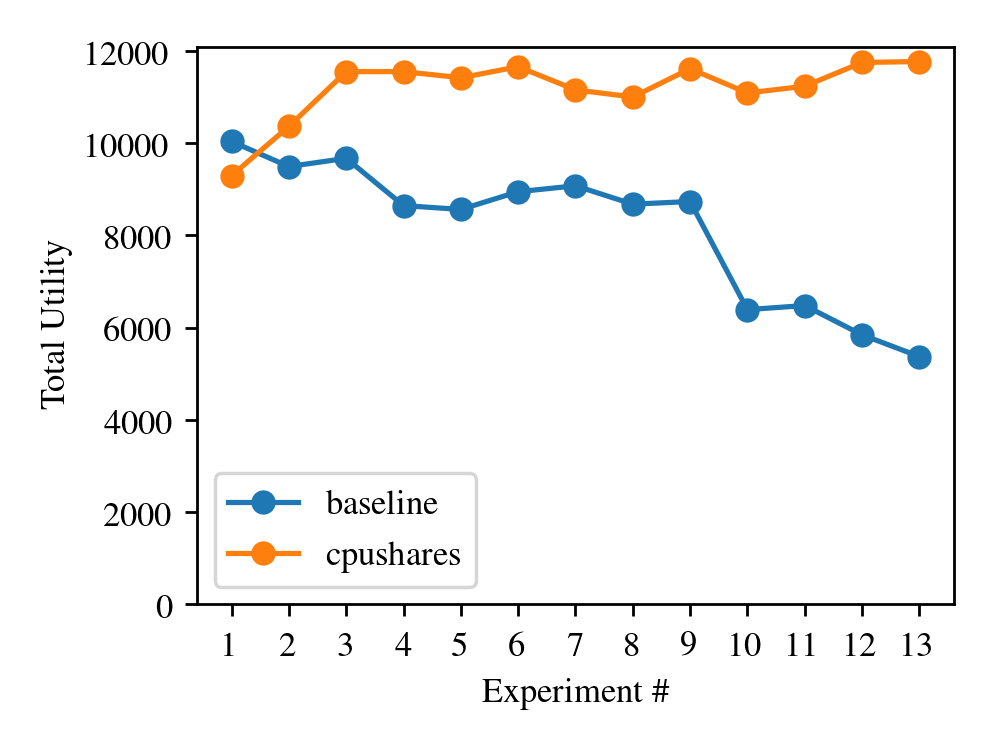

In [89]:
%matplotlib notebook
plt.figure(figsize=(4,3))
for scheme in schemes:
    plt.plot('exp', 'total_utility', 'o-', data=total_utils[total_utils['scheme'] == scheme], label=scheme)
plt.ylim([0, None])
plt.xticks(exps, list(range(1, len(exps)+1)))
plt.xlabel('Experiment \#')
plt.ylabel('Total Utility')
plt.legend()
plt.tight_layout()
plt.savefig('fig-alloc-max-util.pdf', bbox_inches='tight')


<IPython.core.display.Javascript object>


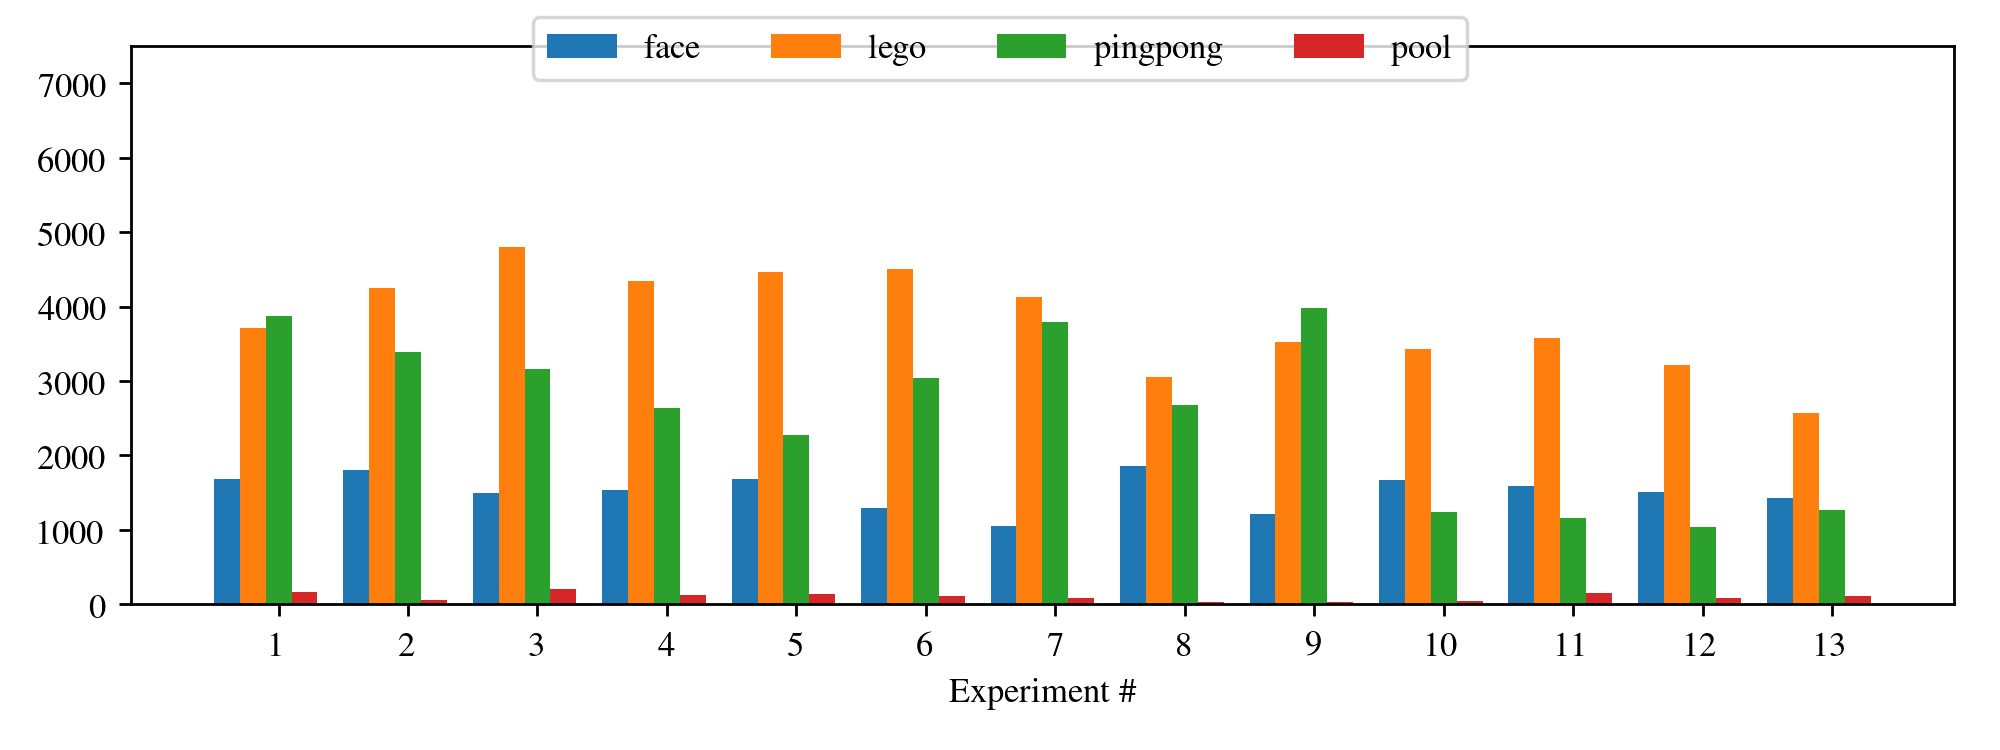

<IPython.core.display.Javascript object>


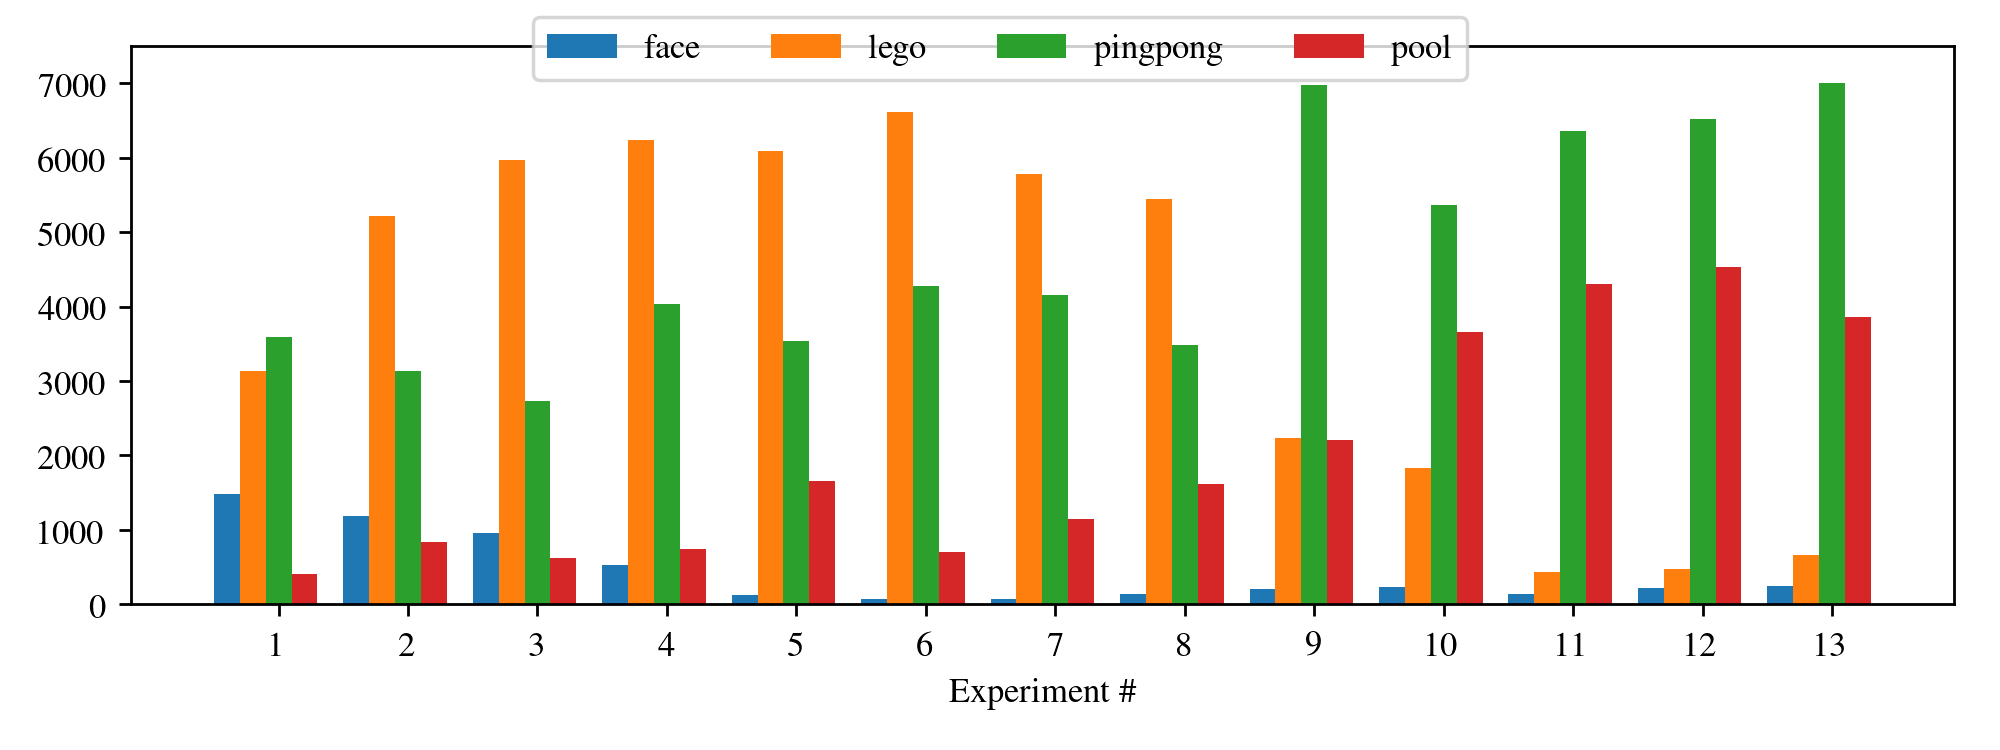

In [90]:
# plot breakdowns of individual apps

for scheme in schemes:
    app_utils = pd.DataFrame()
    
    for exp in exps:
        df = pd.read_sql(
            "select app, sum(utility) as utility from ExpLatency where name=%(name)s group by app",
            schema.engine,
            params={'name': exp+'-'+scheme}
        )
        df['exp'] = exp
        
        app_utils = app_utils.append(df, ignore_index=True)
        
#     print(app_utils)
    
    fig, ax = plt.subplots()
    ind = np.arange(len(exps))
    width = .2
    
    for i, app in enumerate(apps):
        ax.bar(ind + width*i, app_utils[app_utils['app']==app]['utility'], width, label=app)
    ax.set_xticks(ind + width * len(apps) / 2 )
    ax.set_xticklabels(range(1, len(exps)+1))
    ax.set_xlabel('Experiment \#')
    ax.set_ylim([0, 7500])
    fig.set_size_inches((8,3))
    fig.tight_layout()
    fig.legend(loc='upper center', ncol=4)
    fig.savefig('fig-alloc-{}.pdf'.format(scheme), bbox_inches='tight')
            
